In [1]:
# Program    : Pemodelan Inversi untuk penentuan Episenter
# Spesifikasi: Inverse metode Grid Search
# Versi      : 1.0
# Last Edited: 2022-11-23
# Programmer : Sabda Wahidatulhusna

import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
import statistics
warnings.filterwarnings('ignore')



xs=np.array([20,24,60,77,50])
ys=np.array([31,86,88,52,22])
t0=25
vp=4

#model awal
x0=40
y0=60

tcal = np.sqrt((xs - x0)**2 + (ys - y0)**2)/vp
print(tcal)
# Penambahan  Noise
m, s = 0, 2
noise = np.random.normal(m, s, len(tcal))
tobs = tcal + noise


x = np.arange(0, 100, 5)
y = np.arange(0, 100, 5)
# X, Y = np.meshgrid(x, y, sparse=True)
ndata = len(x)
Terr = []
for i in range(len(x)):
    for j in range(len(y)):
        e_total = 0
        for k in range(len(xs)):
            ti = np.sqrt((xs[k] - x[i])**2 + (ys[k] - y[j])**2)/vp
            e = abs(ti - tobs[k])
            Erms = np.sqrt((1/(len(tobs)))*(e)**2)
            e_total += Erms
        Terr.append(e_total)
print("Erms",min(Terr))
print(len(Terr))
Terr0 = np.array(Terr)
Terr1 = Terr0.reshape(ndata, ndata)
Terr1 = Terr1.transpose()
e_value = np.argwhere(Terr1==Terr1.min()).ravel()
xe_baru = x[e_value[1]]
ye_baru = y[e_value[0]]
print("Koordinat Episenter Baru:\n")
print(f'X = {xe_baru}\nY = {ye_baru}')


# Plot Hasil


[8.80695748 7.63216876 8.60232527 9.46374662 9.82344135]
Erms 2.5999256129607606
400
Koordinat Episenter Baru:

X = 35
Y = 65


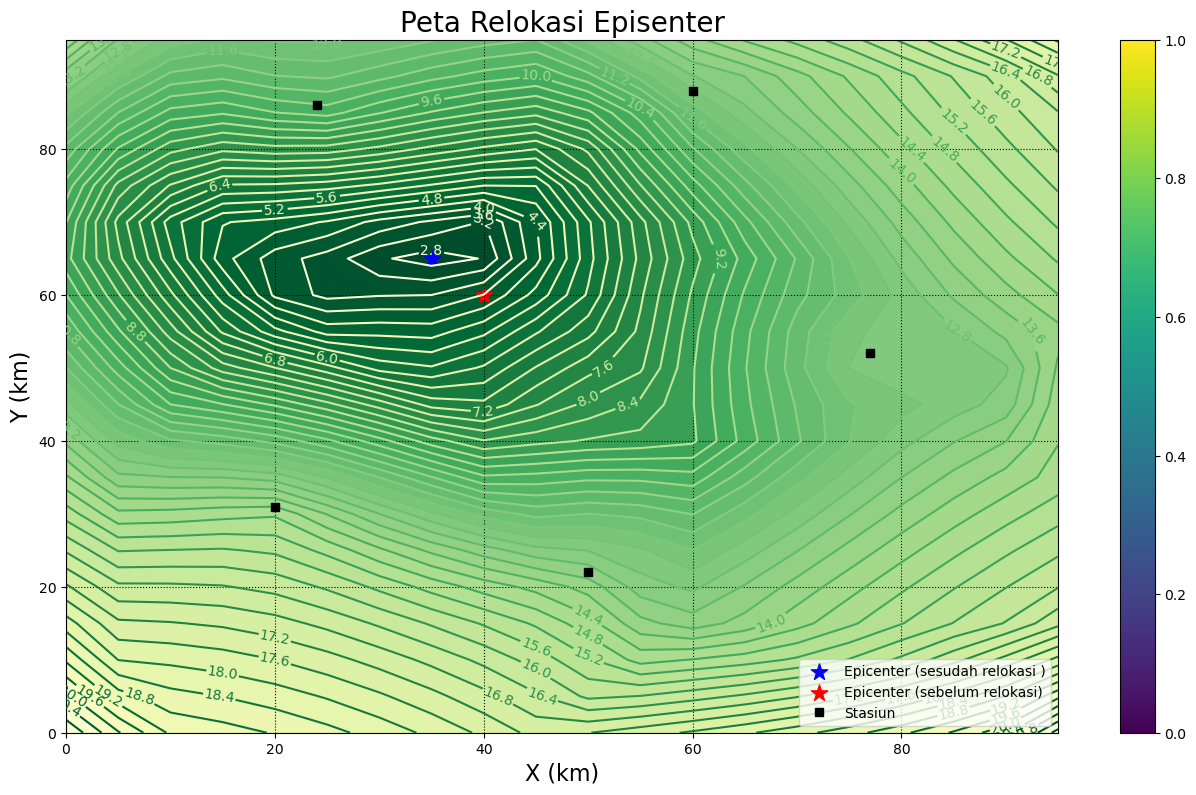

In [3]:
plt.figure(figsize=(16,9))
cs1=plt.contourf(x, y, Terr1,50,cmap=plt.cm.YlGn_r)
cs2=plt.contour(x, y, Terr1,50,cmap=plt.cm.YlGn)
plt.clabel(cs2, fontsize=10)

plt.scatter(xe_baru, ye_baru, c='b', marker='*', s=150, label='Epicenter (sesudah relokasi )')
plt.scatter(x0, y0, c='r', marker='*', s=150, label='Epicenter (sebelum relokasi)')
plt.plot(xs, ys, 'ks', label='Stasiun')
plt.colorbar()
plt.title('Peta Relokasi Episenter', fontsize=20)
plt.xlabel('X (km)', fontsize=16)
plt.ylabel('Y (km)', fontsize=16)
plt.legend(loc='lower right')
plt.grid(linestyle=':',color='black')
plt.show()